In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

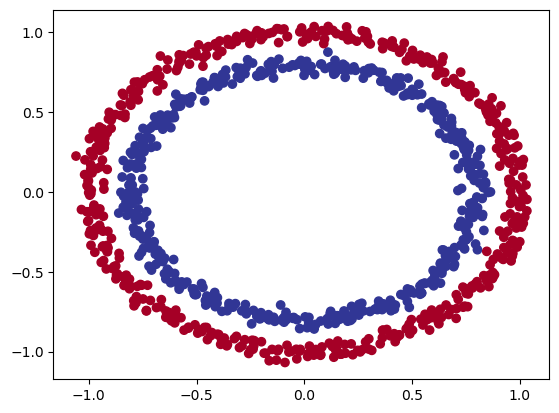

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [13]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.4776 - loss: 4.0667
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.5162 - loss: 0.8179
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5178 - loss: 0.7143
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5150 - loss: 0.6980
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5084 - loss: 0.6942


In [14]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [16]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5498 - loss: 7.0387


[7.523688793182373, 0.5210000276565552]

#Improving on accuracy

In [22]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [23]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5075 - loss: 0.6913


[0.6945558190345764, 0.492000013589859]

In [24]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
doing binary classifcation...


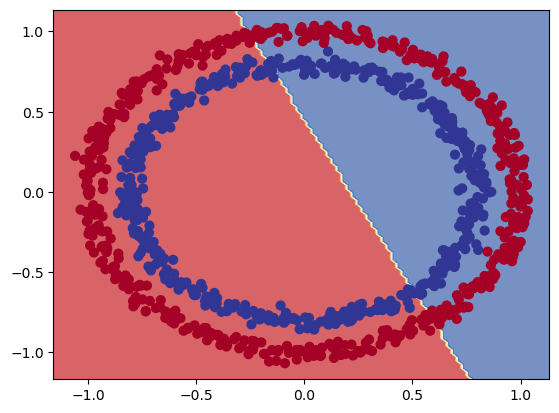

In [25]:
plot_decision_boundary(model_3, X, y)

In [27]:
tf.random.set_seed(42)
X_regression = np.arange(0,1000,5)
y_regression = np.arange(100,1100,5)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_11" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
  • training=True
  • mask=None

In [28]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [32]:
tf.random.set_seed(42) 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 631.9357 - mae: 631.9357  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 512.5602 - mae: 512.5602
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 395.0616 - mae: 395.0616 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277.5160 - mae: 277.5160 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 157.6975 - mae: 157.6975
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.8781 - mae: 51.8781
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.1252 - mae: 81.1252 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.7870 - mae: 84.7870 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.5360 - mae: 54.5360
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.5737 - mae: 45.5737
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.6072 - mae: 46.6072
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.1917 - mae: 42.1917 
Epoch 13/100
5/5 ━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


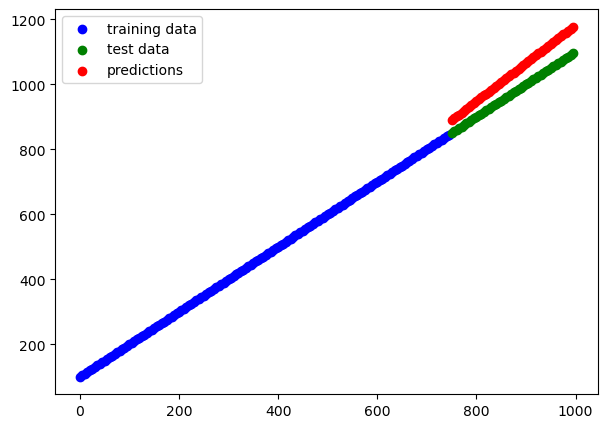

In [37]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(7,5))
plt.scatter(X_reg_train,y_reg_train,c='b',label='training data'),
plt.scatter(X_reg_test,y_reg_test,c='g',label='test data'),
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c='r',label='predictions')
plt.legend()

In [39]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.4005 - loss: 4.4323 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.3936 - loss: 4.2747
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.4169 - loss: 4.1376
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4314 - loss: 4.0945
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.4342 - loss: 3.9920
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.4365 - loss: 3.7717
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4393 - loss: 3.5048
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.4393 - loss: 3.3903
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4386 - loss: 3.1452
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.4402 - loss: 2.9077
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4438 - loss: 2.5395
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
doing binary classifcation...


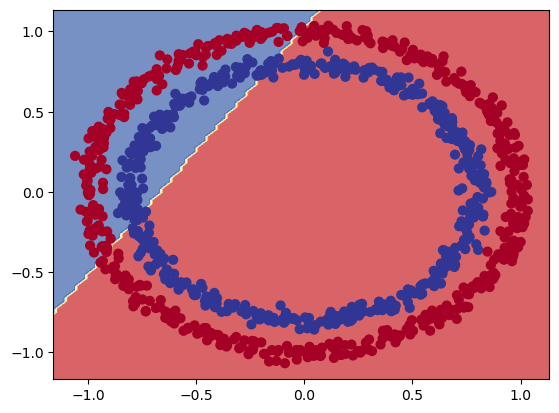

In [40]:
plot_decision_boundary(model_4,X,y)

In [41]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [46]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [47]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.4955 - loss: 8.1322 


[8.05904769897461, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
doing binary classifcation...


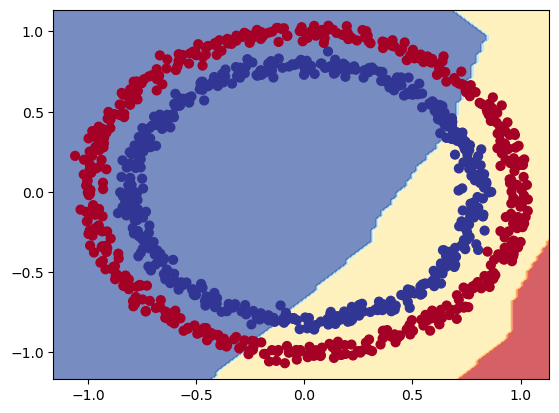

In [48]:
plot_decision_boundary(model_6, X, y)

In [52]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 0.6904   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5549 - loss: 0.6884
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5195 - loss: 0.6873
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5257 - loss: 0.6865
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5303 - loss: 0.6858
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5281 - loss: 0.6852
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5265 - loss: 0.6846
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5261 - loss: 0.6839
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5283 - loss: 0.6833
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5335 - loss: 0.6827
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5329 - loss: 0.6820
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.1739 


[0.17153388261795044, 0.9959999918937683]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
doing binary classifcation...


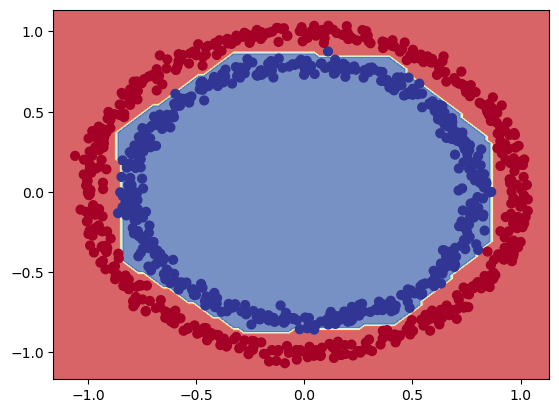

In [54]:
plot_decision_boundary(model_7,X,y)

In [60]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [61]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

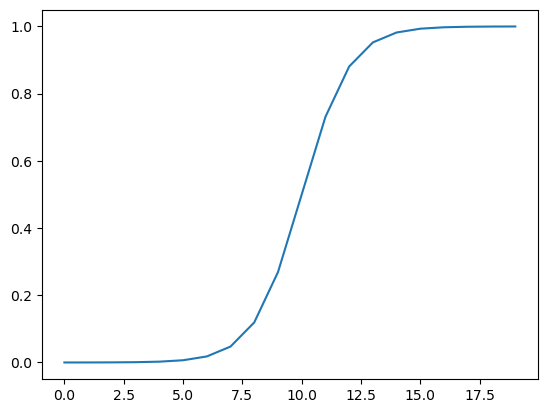

In [62]:
plt.plot(sigmoid(A))

In [63]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

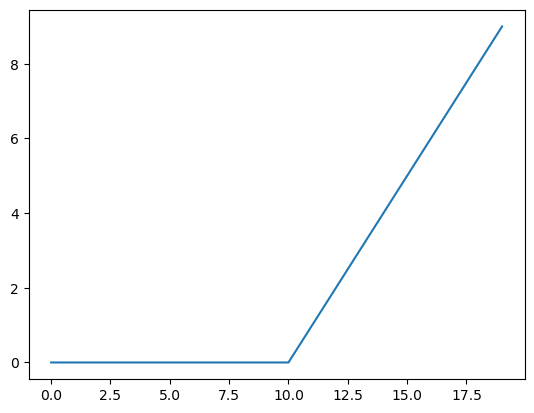

In [64]:
plt.plot(relu(A))

In [65]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [66]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [67]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train,y_